In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

%matplotlib inline

In [2]:
online = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding='latin1')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
online.shape

(541909, 8)

In [5]:
online.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
# UK를 제외한 'Quantity' 주문량이 가장 많은 10개 국가 대상으로 히스토그램 생성
countries = online.groupby(by='Country')['Quantity'].sum()
countries.head(10)

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356
Canada,2763
Channel Islands,9479
Cyprus,6317
Czech Republic,592


In [7]:
countries = countries.sort_values(ascending=False)[1:11]
countries

,Quantity
Country,
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824
Japan,25218


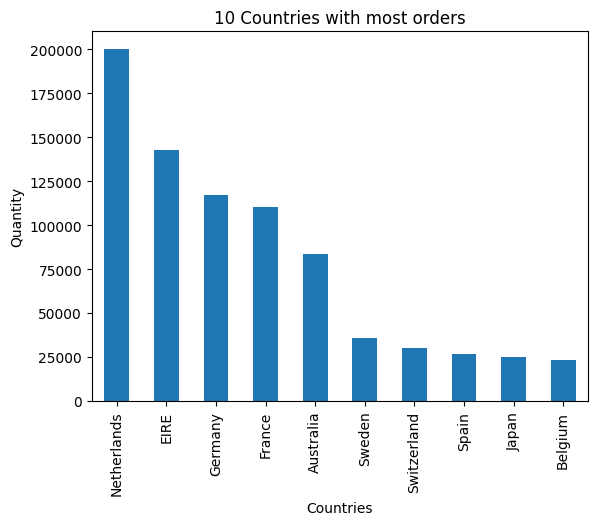

In [8]:
countries.plot(kind='bar')

plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

plt.show()

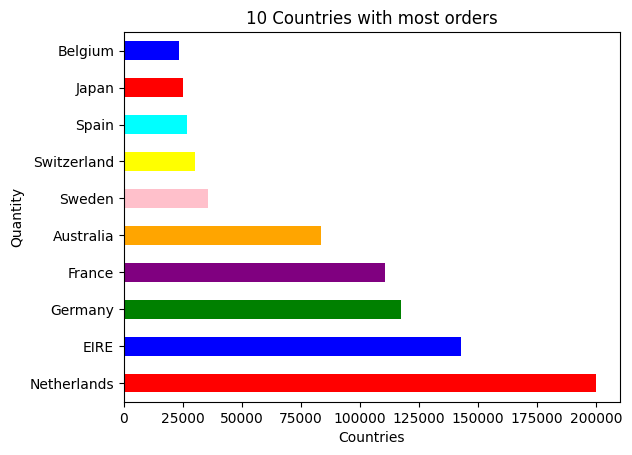

In [9]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'yellow', 'cyan']

countries.plot(kind='barh', color=colors)

plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

plt.show()

In [10]:
# Exclude negative Quantity entries
online = online[online['Quantity'] > 0]
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [11]:
# Create a scatterplot with the Quantity per UnitPrice by CustomID for the top 3 Countries (except UK)
# 고객 ID별 단위 가격당 수량을 상위 3개 국가에 대해 산점도 생성

customers = online.groupby(by=['Country', 'CustomerID']).sum()
customers[['Quantity', 'UnitPrice']].head()

Quantity  UnitPrice
Country   CustomerID                     
Australia 12386.0          354      23.91
          12388.0         1462     277.77
          12393.0          816     145.90
          12415.0        77670    2097.08
          12422.0          195      51.12

In [12]:
customers = customers[['Quantity', 'UnitPrice']]
customers.sort_values(by='Country', ascending=False)

Quantity  UnitPrice
Country        CustomerID                     
Unspecified    16320.0          732     138.91
               14265.0          330     181.75
               12743.0          319     407.17
               12363.0          408      53.17
United Kingdom 16270.0          688     174.03
...                             ...        ...
Australia      12388.0         1462     277.77
               12431.0         2443     705.57
               12434.0          394     183.63
               16321.0          135      44.10
               12386.0          354      23.91

[4347 rows x 2 columns]

In [13]:
# 고객 ID별 단위 가격당 수량을 상위 3개 국가에 대해 산점도 생성
top = online.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
top.head()

,Quantity
Country,
United Kingdom,4733819
Netherlands,200937
EIRE,147447
Germany,119263
France,112104


In [14]:
top = top[top.index != 'United Kingdom'].head(3)
top

,Quantity
Country,
Netherlands,200937
EIRE,147447
Germany,119263


In [15]:
customers = online[online['Country'].isin(top.index)].groupby(['Country', 'CustomerID']).sum().reset_index()
customers[['Country', 'CustomerID', 'UnitPrice', 'Quantity']]

,Country,CustomerID,UnitPrice,Quantity
0,EIRE,14016.0,635.88,2125
1,EIRE,14156.0,5357.68,57885
2,EIRE,14911.0,26185.72,80515
3,Germany,12426.0,118.09,258
4,Germany,12427.0,142.26,533
...,...,...,...,...
101,Netherlands,12789.0,91.85,4
102,Netherlands,12790.0,82.92,166
103,Netherlands,12791.0,16.85,97
104,Netherlands,12802.0,63.00,314


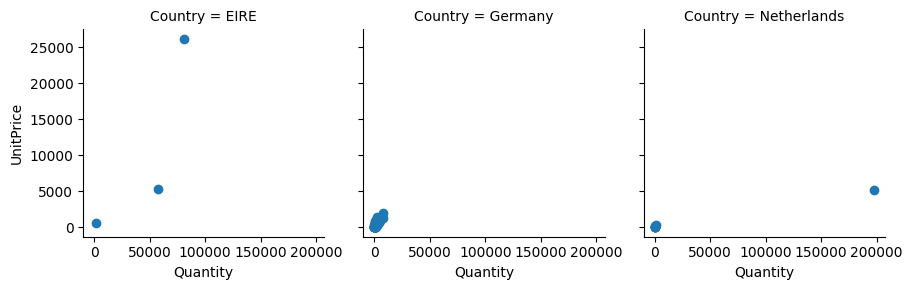

In [16]:
# 산점도 그리기
g = sns.FacetGrid(customers, col='Country')

# x축 데이터, y축 데이터, 투명도 설정
g.map(plt.scatter, 'Quantity', 'UnitPrice', alpha=1)

g.add_legend() # 범례 추가

- **map() 함수:** 반복가능한 객체의 각 요소에 특정 함수를 적용할 때 사용

# Investigate why the previous results look so uninformative.

### Display the first few rows of that DataFrame.

In [17]:
# 첫 번째 코드 줄을 살펴보고, 이 코드가 어떤 문제를 일으킬 수 있는지 생각해봐라.
customers = online.groupby(['CustomerID', 'Country']).sum()
customers[['Quantity', 'UnitPrice']].head()

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


In [18]:
# Think about what that piece of code does and display the dtype of UnitPrice.
customers['UnitPrice'].dtypes

dtype('float64')

In [19]:
# Pull data from 'online' for 'CustomerID's 12346.0 and 12347.0.
filtered_df = online[online['CustomerID'].isin([12346.0, 12347.0])]
filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


In [20]:
filtered_df = online[(online['CustomerID'] == 12346.0) | (online['CustomerID'] == 12347.0)]
print(filtered_df)

       InvoiceNo StockCode                          Description  Quantity  \
14938     537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
14939     537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
14940     537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
14941     537626     22492              MINI PAINT SET VINTAGE         36   
14942     537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   
...          ...       ...                                  ...       ...   
535010    581180     20719               WOODLAND CHARLOTTE BAG        10   
535011    581180     21265         PINK GOOSE FEATHER TREE 60CM        12   
535012    581180     23271  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
535013    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
535014    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   

          InvoiceDate  UnitPrice  CustomerID  Country  
14938   12/7/10 14:

In [21]:
online[online['CustomerID'] == 12347.0].sort_values(by='UnitPrice', ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
220577,556201,23173,REGENCY TEAPOT ROSES,2,6/9/11 13:01,9.95,12347.0,Iceland


In [22]:
# 고객 ID별 단위 가격당 수량을 상위 3개 국가별로 산점도로 작성해라.

# 판매량을 기준으로 상위 3개국 확인
top_3 = online.groupby(by='Country')['Quantity'].sum().sort_values(ascending=False).head(4)
top_3

,Quantity
Country,
United Kingdom,4733819
Netherlands,200937
EIRE,147447
Germany,119263


In [23]:
# UK 제외
top_3 = top_3[top_3.index != 'United Kingdom'].head(3)
top_3

,Quantity
Country,
Netherlands,200937
EIRE,147447
Germany,119263


In [24]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [25]:
# online 테이블에 Revenue 열을 추가하고 각 판매에서 수익(수량 * 단위가격)을 계산
online['Revenue'] = online['Quantity'] * online['UnitPrice']
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [26]:
online['Revenue'].dtypes

dtype('float64')

In [30]:
# Group by 'CustomerID' and 'Country' and find out the average price (AvgPrice) each customer spends per unit.
# 각 고객이 단위당 지출하는 평균 가격 계산

avg_price = online[online['Country'].isin(top_3)].groupby(['CustomerID', 'Country'])
avg_price.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue


In [35]:
avg = avg_price[['Quantity', 'Revenue']].agg('sum')
avg

,,Quantity,Revenue
CustomerID,Country,,


In [36]:
avg['AvgPrice'] = avg['Revenue'] / avg['Quantity']
avg['Country'] = avg.index.get_level_values(1)
avg.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,


- **get_level_values()**: Pandas의 멀티인덱스에서 특정 레벨의 값을 추출할 때 사용하는 함수

## Group 'UnitPrice' by intervals of 1 for prices [0, 50), and sum 'Quantity' and 'Revenue'.

In [41]:
# 가격 [0, 50) 구간별로 'UnitPrice'를 그룹화하고, 'Qunatity'와 'Revenue'를 합계
start = 0
end = 50
interval = 1

# arange = array + range
range = np.arange(start, end, interval)

revenue_per_price = online.groupby(pd.cut(online['UnitPrice'], range))[['Revenue', 'Quantity']].sum()
revenue_per_price.head()

<ipython-input-41-150393832>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_per_price = online.groupby(pd.cut(online['UnitPrice'], range))[['Revenue', 'Quantity']].sum()


,Revenue,Quantity
UnitPrice,,
"(0, 1]",1107774.544,2123919
"(1, 2]",2691765.110,1841466
"(2, 3]",2024143.090,837931
"(3, 4]",865101.780,243381
"(4, 5]",1219377.050,269647


- **np.arange():** Numpy에서 숫자 범위를 가진 배열을 생성할 때 자주 쓰이는 함수
- np.arange(start, stop, step)

- **pd.cut()**: 연속형 숫자 데이터를 구간(bins)으로 나누어 범주형 데이터로 변환할 때 사용하는 Pandas 함수

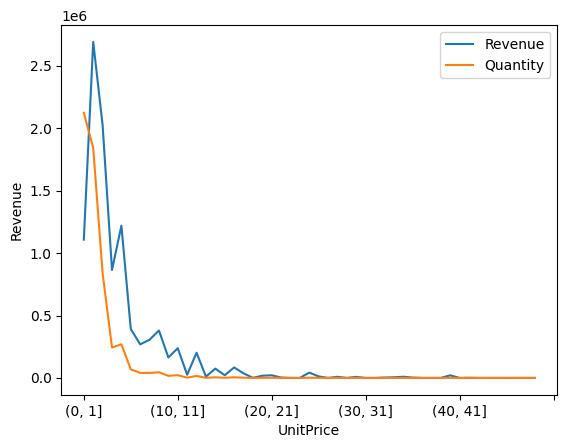

In [42]:
# Plot
revenue_per_price.plot()

plt.xlabel('UnitPrice')
plt.ylabel('Revenue')

plt.show()

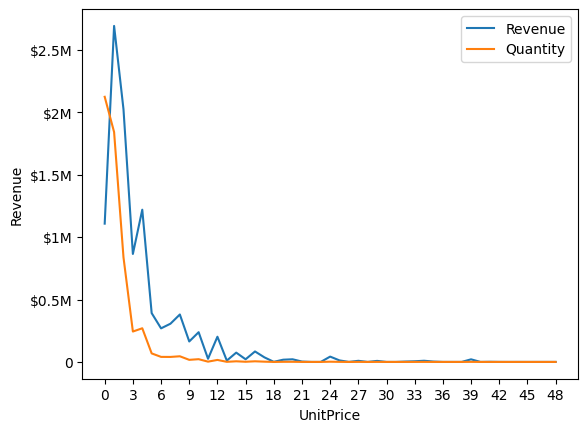

In [43]:
# Make it look nicer.
revenue_per_price.plot()

plt.xlabel('UnitPrice')
plt.ylabel('Revenue')

# xticks(ticks=Nonw, labels=None) → ticks(눈금이 표시될 위치) | labels(각 눈금에 표시할 텍스트)
plt.xticks(ticks = np.arange(start, end, 3), labels = np.arange(start, end, 3))
plt.yticks(ticks = [0, 500000, 1000000, 1500000, 2000000, 2500000], labels = ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])

plt.show()